In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/drug200.csv")

In [3]:
# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col])

In [4]:
# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col])

In [6]:
X = df.drop("Drug", axis=1).values
y = df["Drug"].values

In [7]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         5
           3       0.71      0.91      0.80        11
           4       0.88      1.00      0.94        15

    accuracy                           0.85        40
   macro avg       0.72      0.78      0.75        40
weighted avg       0.75      0.85      0.80        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Re-train LinearSVC on 2D data for plotting
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)
svc_2d = LinearSVC()
svc_2d.fit(X_train_2d, y_train_2d)

LinearSVC()

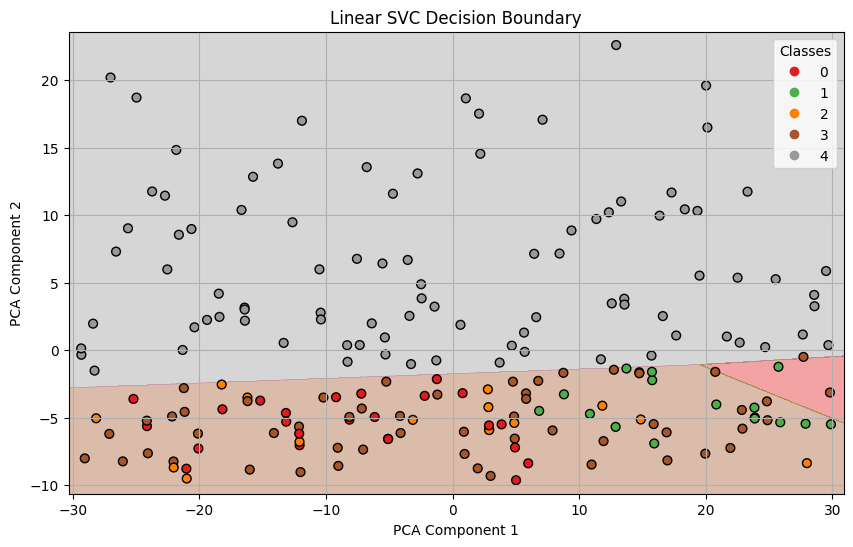

In [10]:
import numpy as np

def plot_decision_boundary(clf, X, y, title="Linear SVC Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap='Set1')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()

# Plot the result
plot_decision_boundary(svc_2d, X_2d, y)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models to test
models = {
    "Linear Kernel": SVC(kernel='linear'),
    "Polynomial Degree 2": SVC(kernel='poly', degree=2),
    "Polynomial Degree 3": SVC(kernel='poly', degree=3),
    "Polynomial Degree 4": SVC(kernel='poly', degree=4),
    "RBF Kernel": SVC(kernel='rbf')
}

# Train, predict, and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'Accuracy': acc,
        'Classification Report': report
    }

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



=== Linear Kernel ===
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


=== Polynomial Degree 2 ===
Accuracy: 0.5750
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         5
           3       0.38      0.82      0.51        11
           4       0.93      0.87      0.90        15

    accuracy                           0.57        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

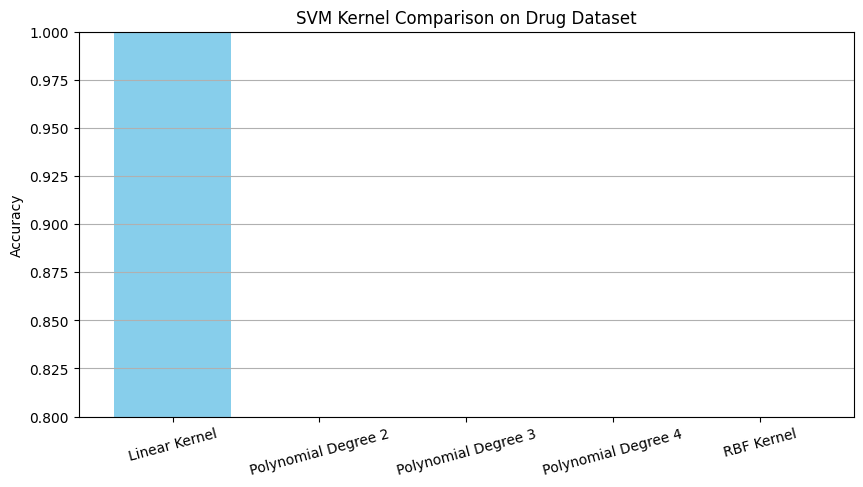

In [12]:
import matplotlib.pyplot as plt

# Extract accuracy scores
kernel_names = list(results.keys())
accuracies = [results[k]['Accuracy'] for k in kernel_names]

plt.figure(figsize=(10, 5))
plt.bar(kernel_names, accuracies, color='skyblue')
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.title("SVM Kernel Comparison on Drug Dataset")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Grid of (C, gamma) values to test
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]

results = []

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        results.append({'C': C, 'gamma': gamma, 'accuracy': acc})
        print(f"--- RBF Kernel | C={C}, gamma={gamma} ---")
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))


--- RBF Kernel | C=0.1, gamma=0.01 ---
Accuracy: 0.4000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.25      0.09      0.13        11
           4       0.42      1.00      0.59        15

    accuracy                           0.40        40
   macro avg       0.13      0.22      0.14        40
weighted avg       0.23      0.40      0.26        40

--- RBF Kernel | C=0.1, gamma=0.1 ---
Accuracy: 0.3750
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        11
           4       0.38      1.00      0.55        15

    accuracy                           0.38        40
   macro avg       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.40      0.67      0.50         3
           2       0.43      0.60      0.50         5
           3       0.62      0.45      0.53        11
           4       1.00      1.00      1.00        15

    accuracy                           0.72        40
   macro avg       0.65      0.68      0.65        40
weighted avg       0.75      0.72      0.73        40

--- RBF Kernel | C=10, gamma=1 ---
Accuracy: 0.3750
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        11
           4       0.38      1.00      0.55        15

    accuracy                           0.38        40
   macro avg       0.07      0.20      0.11        40
weighted avg       0.14  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


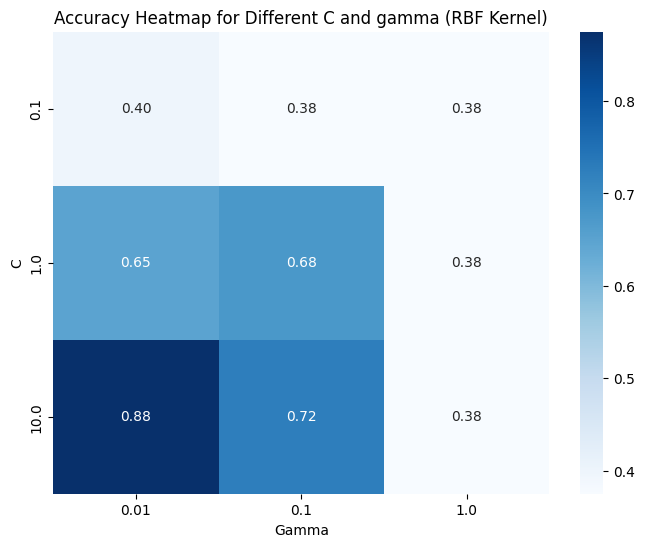

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame for plotting
df_results = pd.DataFrame(results)

# Plot heatmap of accuracy
pivot_table = df_results.pivot(index='C', columns='gamma', values='accuracy')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
plt.title("Accuracy Heatmap for Different C and gamma (RBF Kernel)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()